In [1]:
def read_CSV_in_years(YEARS = ('2019', '2020', '2021', '2022', '2023')):
    '''
    Parameters
    -----------
    YEARS        : Years to include/open.

    Parameters
    -----------
    Opens all the MRT train csv files within the provided years.
    Call cleanCSV() to open, clean, and return a dataframe.

    Return   
    ------------
    pd.Dataframe : All the cleaned CSVs compiled into a single dataframe.
    '''
    compiled_df = []
    FILES = listdir('MTR Parsed')

    # OPEN AND STORE ALL THE TARGET CSV FILES
    for fileName in FILES:
        if fileName[-4:] == '.csv' and fileName[:4] in YEARS:
            compiled_df.append(clean_CSV(fileName))
    
    return pd.concat(compiled_df)

In [2]:
def clean_CSV(fileName, min_traffic_threshold = 0):
    '''
    Parameters
    -----------
    fileName               : String name of the .csv file.
    min_traffic_threshold  : Stations records with daily traffic below the threshold will be dropped.

    Parameters
    -----------
    Open the csv file and drop all records of stations with little/no activity for the entire day.

    Return   
    ------------
    pd.Dataframe : The cleaned csv data.
    '''
    df = pd.read_csv('MTR Parsed/' + fileName)
    # REMOVE INDEX COL
    df = df.drop(df.columns[0], axis=1)
    
    # CHECK THE TRAFFIC ACTIVITY OF PER STATION EVERYDAY 
    activity_check = df[['Day', 'Station_No', 'Net_Traffic']]
    activity_check = activity_check.groupby(['Day', 'Station_No']).sum()
    
    # KEEP ONLY THE STATION RECORDS THAT HAD ACTIVITY FOR THAT DAY
    records_to_keep = activity_check[activity_check.values > min_traffic_threshold]
    df = df.set_index(['Day', 'Station_No']).join(records_to_keep, lsuffix='' , rsuffix='_ActivityCheck')
    df = df.dropna(axis=0)
    df = df.rename(columns={df.columns[-1]:'Station_Total_Day_Traffic'})

    
    df = df.reset_index().set_index('Date')
    return df

# Title and Authors

# Introduction of Problem

Link of Dataset

# List of Requirements

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from os import listdir

In [4]:
df = read_CSV_in_years()
df

,Day,Station_No,Time,Station_Name,Entry,Exit,Net_Traffic,Year,Month,Hour,Weekday,Is_Holiday,Station_Total_Day_Traffic
Date,,,,,,,,,,,,,
2019-01-01,1,0,03:00 - 03:59,North Ave,0,0.0,0.0,2019,1,3,1,True,36598.0
2019-01-01,1,0,04:00 - 04:59,North Ave,0,0.0,0.0,2019,1,4,1,True,36598.0
2019-01-01,1,0,05:00 - 05:59,North Ave,0,0.0,0.0,2019,1,5,1,True,36598.0
2019-01-01,1,0,06:00 - 06:59,North Ave,376,13.0,389.0,2019,1,6,1,True,36598.0
2019-01-01,1,0,07:00 - 07:59,North Ave,471,240.0,711.0,2019,1,7,1,True,36598.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,31,12,22:00 - 22:59,Taft,0,0.0,0.0,2023,12,22,6,True,58246.0
2023-12-31,31,12,23:00 - 23:59,Taft,0,0.0,0.0,2023,12,23,6,True,58246.0
2023-12-31,31,12,00:00 - 00:59,Taft,0,0.0,0.0,2023,12,0,6,True,58246.0


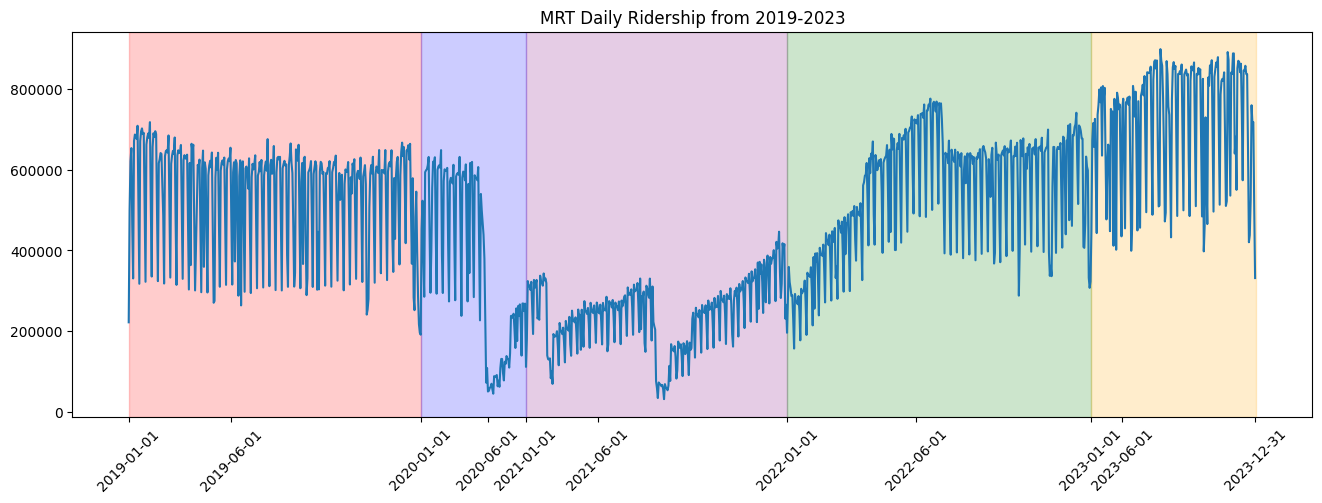

In [5]:
timeSummary = df['Net_Traffic'].groupby('Date').sum()

fig = plt.subplots(figsize=(16, 5))
plt.plot(timeSummary)
plt.title("MRT Daily Ridership from 2019-2023")

ticks = ['2019-01-01',  '2019-06-01', 
         '2020-01-01',  '2020-06-01',
         '2021-01-01',  '2021-06-01',
         '2022-01-01',  '2022-06-01',
         '2023-01-01',  '2023-06-01', '2023-12-31']
plt.xticks(ticks, rotation=45)
plt.axvspan('2019-01-01', '2020-01-01', color='red', alpha=0.2)
plt.axvspan('2020-01-01', '2021-01-01', color='blue', alpha=0.2)
plt.axvspan('2021-01-01', '2022-01-01', color='purple', alpha=0.2)
plt.axvspan('2022-01-01', '2023-01-01', color='green', alpha=0.2)
plt.axvspan('2023-01-01', '2024-01-01', color='orange', alpha=0.2)

In [6]:
composition = df.groupby('Year').count()
composition['Percentage'] = composition.iloc[:,1] / composition.iloc[:,1].sum()
composition.rename(columns={"Time":"Number of Data Points"}, inplace=True)
composition[['Number of Data Points', 'Percentage']]

,Number of Data Points,Percentage
Year,,
2019,102960,0.259027
2020,37128,0.093407
2021,92040,0.231554
2022,107016,0.269231
2023,58344,0.146782


# Data Cleaning and Preprecessing

### Drop vs Feature Scale
Looking at the time series graph above, how do we adjust it?

There's a visible dip around 2020-06 to 2022-03.

Dropping will be the simplest solution but may remove a fourth (~25%) of all our data points.<br>
Feature scaling may be the option considering that the pattern is maintained and only less in value.

In [7]:
# TODO: ATTEMPT FEATURE SCALING OR DROPPING

# Exploratory Analysis

In [8]:
def plot_Entry(colName, title, xlabel, xticks):
    analysis = df[[colName, 'Station_Name', 'Entry']].groupby(['Station_Name', colName]).mean()
    fig = plt.subplots(figsize=(16, 5))

    for station in analysis.index.get_level_values('Station_Name').unique():
        plt.plot(analysis.loc[station], label=station)
    
    plt.legend()
    plt.grid()
    
    plt.title(title)
    plt.ylabel('Number of Commuters Entering') 
    plt.xlabel(xlabel) 
    plt.xticks(xticks)
    
    plt.show()

    # return analysis

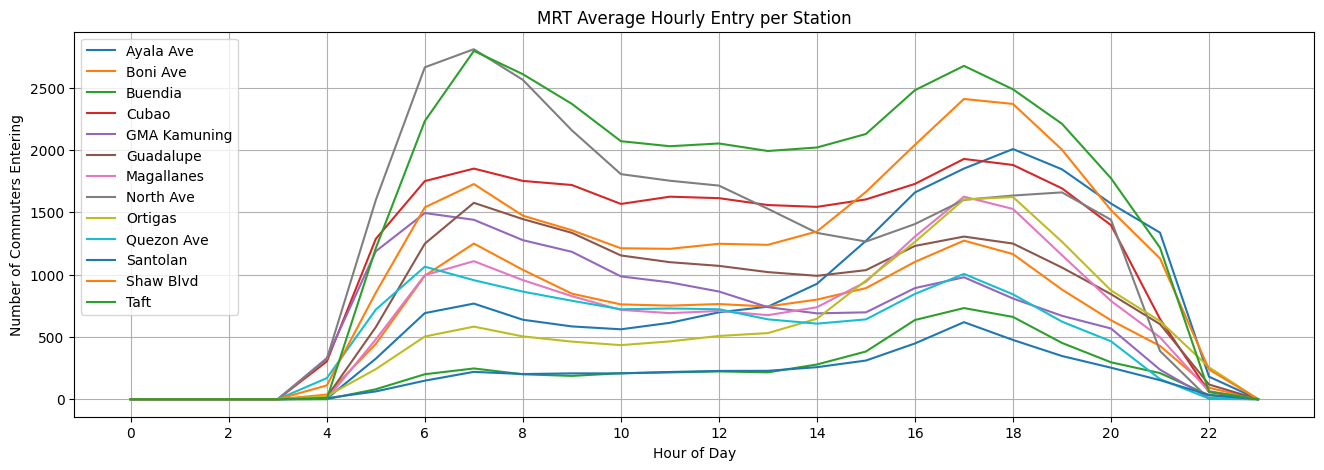

In [9]:
plot_Entry(colName='Hour', title='MRT Average Hourly Entry per Station', xlabel='Hour of Day', xticks=np.arange(0,24,2))

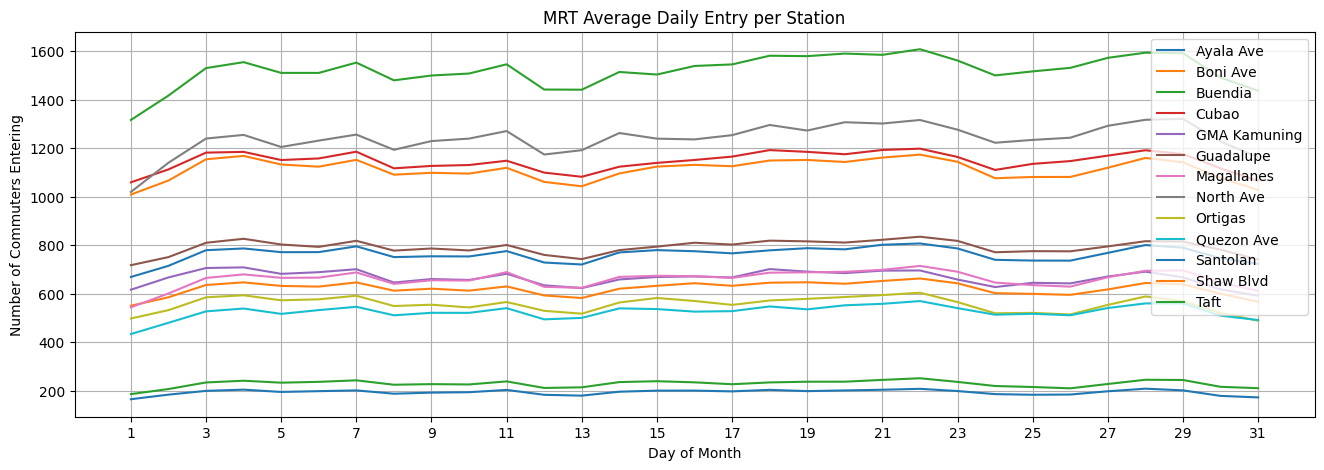

In [10]:
plot_Entry(colName='Day', title='MRT Average Daily Entry per Station', xlabel='Day of Month', xticks=np.arange(1,32,2))

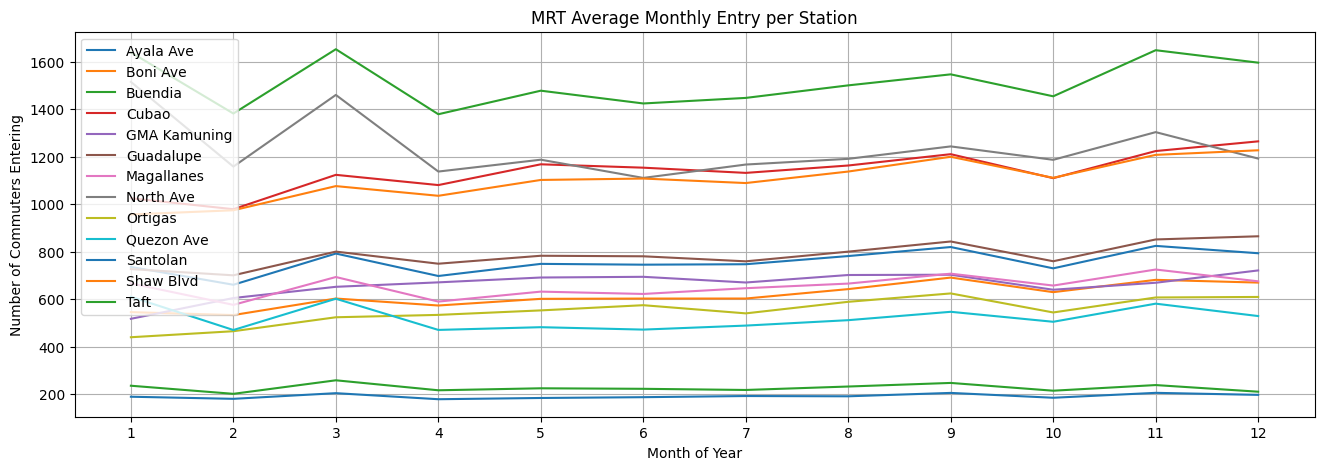

In [11]:
plot_Entry(colName='Month', title='MRT Average Monthly Entry per Station', xlabel='Month of Year', xticks=np.arange(1,13))

{'whiskers': [<matplotlib.lines.Line2D at 0x2dbefc30e80>,
 'caps': [<matplotlib.lines.Line2D at 0x2dbefc313c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2dbefc30be0>],
 'medians': [<matplotlib.lines.Line2D at 0x2dbefc31900>],
 'fliers': [<matplotlib.lines.Line2D at 0x2dbefc31ba0>],
 'means': []}

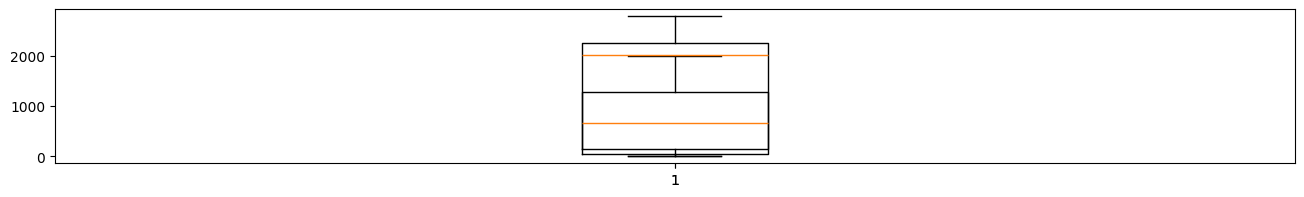

In [12]:
plot_data = df[['Station_Name', 'Hour', 'Entry']].groupby(['Station_Name', 'Hour']).mean()

fig, ax = plt.subplots(figsize=(16,2))

ax.boxplot(plot_data.loc['Taft'])
ax.boxplot(plot_data.loc['Ayala Ave'])
# ax.boxplot(plot_data.loc['Ayala Ave'])
# fig = plt.figure(figsize =(16, 5))
# ax = fig.add_axes([0, 0, 1, 1])

# ax[0].boxplot(plot_data.loc['Taft'])
# ax[1].boxplot(plot_data.loc['Ayala Ave'])

([<matplotlib.axis.YTick at 0x2dbf8575000>,
 [Text(0, 0, 'Station_No'),
  Text(0, 1, 'Entry'),
  Text(0, 2, 'Exit'),
  Text(0, 3, 'Year'),
  Text(0, 4, 'Month'),
  Text(0, 5, 'Day'),
  Text(0, 6, 'Hour'),
  Text(0, 7, 'Weekday'),
  Text(0, 8, 'Is_Holiday')])

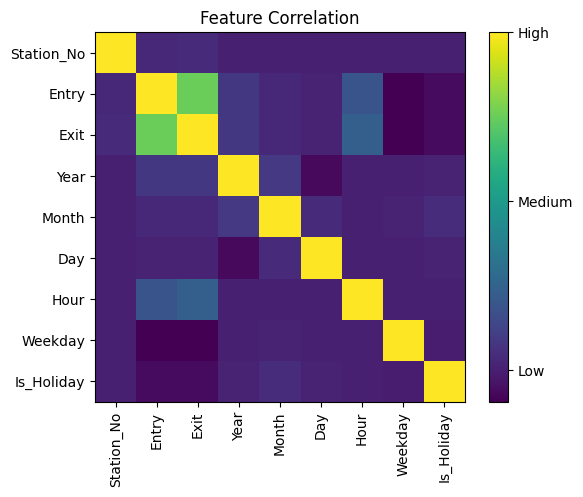

In [32]:
corr_matrix = df[['Station_No', 'Entry', 'Exit', 'Year', 'Month','Day', 'Hour', 'Weekday', 'Is_Holiday']].corr()
fig = plt.subplots()

plt.imshow(corr_matrix)

# Add colorbar 
cbar = plt.colorbar(ticks=[0, 0.5, 1]) 
cbar.ax.set_yticklabels(['Low', 'Medium', 'High']) 
  
plt.title('Feature Correlation')
plt.xticks(range(len(corr_matrix.columns)),
           corr_matrix.columns, rotation=90) 
plt.yticks(range(len(corr_matrix.columns)), 
           corr_matrix.columns) 

([<matplotlib.axis.XTick at 0x2dbfc4e0190>,
 [Text(0.0, 0, '2019-01-01'),
  Text(116.0, 0, '2019-06-01'),
  Text(330.0, 0, '2020-01-01'),
  Text(406.0, 0, '2020-06-01'),
  Text(449.0, 0, '2021-01-01'),
  Text(530.0, 0, '2021-06-01'),
  Text(744.0, 0, '2022-01-01'),
  Text(890.0, 0, '2022-06-01'),
  Text(1087.0, 0, '2023-01-01'),
  Text(1123.0, 0, '2023-06-01'),
  Text(1273.0, 0, '2023-12-31')])

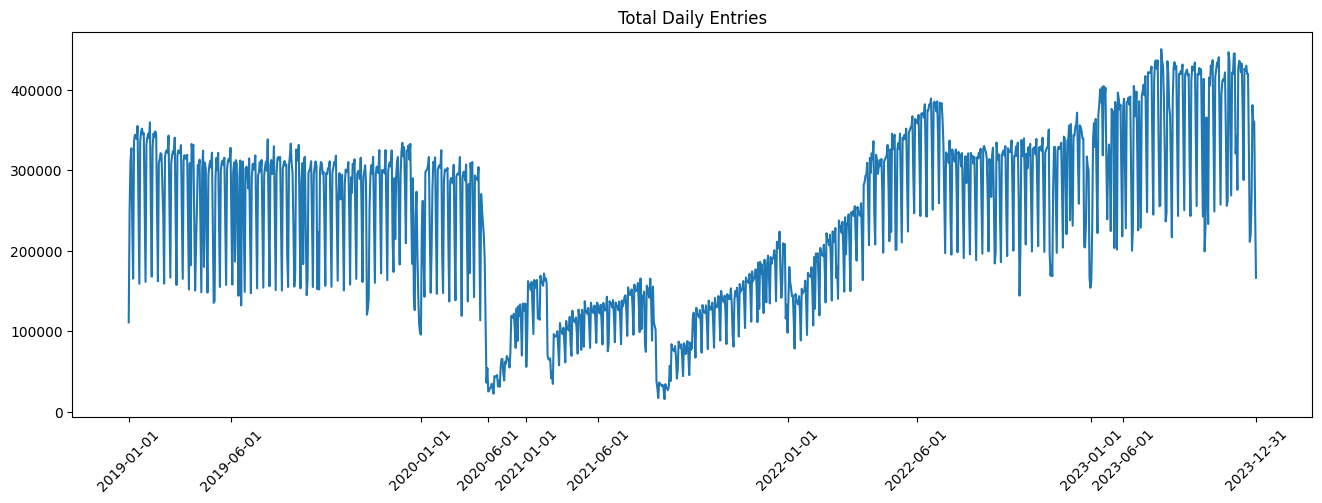

In [40]:
fig = plt.subplots(figsize=(16,5))

plt.plot(df['Entry'].groupby('Date').sum())

plt.title('Total Daily Entries')

ticks = ['2019-01-01',  '2019-06-01', 
         '2020-01-01',  '2020-06-01',
         '2021-01-01',  '2021-06-01',
         '2022-01-01',  '2022-06-01',
         '2023-01-01',  '2023-06-01', '2023-12-31']
plt.xticks(ticks, rotation=45)

# Feature Extraction

# Model Training

# Feature Selection & Hyperparameter Tuning

# Summary of the Best Model Configurat